# Swim analysis of the 1500m
this notebook aims for some data exploration and data enginering  

tasks:
1- organize the data and variables 

2- data exploration

3- check for outliers

4- data enginering

5- visualization

6- data analysis

7- clustering

8- predictions

9- model evaluation


31.01.2024

Tiago Russomanno


In [46]:
# libraries 
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [47]:
# dataframe load  with the paces
df = pd.read_excel('pace_olympics_org.xlsx')

df.head()

,games,heat,Olympic,medal,Overall Rank,Lane,Country,Athlete,Age,RT,...,1050m,1100m,1150m,1200m,1250m,1300m,1350m,1400m,1450m,1500m
0,Tokyo,final,1,1.0,1,5,USA,Bobby FINKE,21,0.75,...,29.56,29.30,29.59,29.54,29.42,29.50,29.40,29.42,28.60,25.78
1,Tokyo,final,1,2.0,2,4,UKR,Mykhailo ROMANCHUK,24,0.70,...,29.41,29.59,29.56,29.64,29.41,29.58,29.46,29.48,28.61,26.78
2,Tokyo,final,1,3.0,3,3,GER,Florian WELLBROCK,23,0.70,...,29.61,29.41,29.73,29.38,29.61,29.41,29.60,29.12,28.49,27.76
3,Tokyo,final,1,4.0,4,6,ITA,Gregorio PALTRINIERI,26,0.80,...,29.35,29.78,29.39,29.90,29.38,29.93,29.04,29.68,29.27,29.16
4,Tokyo,final,1,4.0,5,2,GBR,Daniel JERVIS,25,0.64,...,30.29,30.44,30.32,30.24,30.47,30.35,30.35,30.23,29.76,28.74


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174 entries, 0 to 173
Data columns (total 43 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   games         174 non-null    object 
 1   heat          174 non-null    object 
 2   Olympic       174 non-null    int64  
 3   medal         173 non-null    float64
 4   Overall Rank  174 non-null    int64  
 5   Lane          174 non-null    int64  
 6   Country       174 non-null    object 
 7   Athlete       174 non-null    object 
 8   Age           174 non-null    int64  
 9   RT            174 non-null    float64
 10  Time          174 non-null    object 
 11  Time Behind   174 non-null    object 
 12  Points        172 non-null    object 
 13   50m          174 non-null    float64
 14   100m         174 non-null    float64
 15   150m         174 non-null    float64
 16   200m         174 non-null    float64
 17   250m         174 non-null    float64
 18   300m         174 non-null    

In [49]:
# data organization
df.columns = df.columns.str.strip()
df['Athlete'] = df['Athlete'].astype(str)
df['heat'] = df['heat'].astype(str)
df['games'] = df['games'].astype(str)
df['Country'] = df['Country'].astype(str)
#df['time'] = pd.to_datetime(df['Time'], format='%M:%S.%f')
df['datetime_column'] = pd.to_datetime(df['Time'])
df['time_only'] = df['datetime_column'].dt.strftime('%H:%M:%S.%f').str.rstrip('0')
df['total_time'] = df.loc[:, '50m':'1500m'].sum(axis=1)

### new features 

In [50]:
df['FH']=df.iloc[:,13:29].sum(axis=1)
df['SH']=df.iloc[:,27:43].sum(axis=1)
df.head(5)

,games,heat,Olympic,medal,Overall Rank,Lane,Country,Athlete,Age,RT,...,1300m,1350m,1400m,1450m,1500m,datetime_column,time_only,total_time,FH,SH
0,Tokyo,final,1,1.0,1,5,USA,Bobby FINKE,21,0.75,...,29.50,29.40,29.42,28.60,25.78,2024-02-23 14:39:39,14:39:39.,879.65,471.27,467.71
1,Tokyo,final,1,2.0,2,4,UKR,Mykhailo ROMANCHUK,24,0.70,...,29.58,29.46,29.48,28.61,26.78,2024-02-23 14:40:39,14:40:39.,880.66,471.07,469.04
2,Tokyo,final,1,3.0,3,3,GER,Florian WELLBROCK,23,0.70,...,29.41,29.60,29.12,28.49,27.76,2024-02-23 14:40:54,14:40:54.,880.91,470.74,469.58
3,Tokyo,final,1,4.0,4,6,ITA,Gregorio PALTRINIERI,26,0.80,...,29.93,29.04,29.68,29.27,29.16,2024-02-23 14:45:00,14:45:00.,885.01,471.78,472.54
4,Tokyo,final,1,4.0,5,2,GBR,Daniel JERVIS,25,0.64,...,30.35,30.35,30.23,29.76,28.74,2024-02-23 14:55:28,14:55:28.,895.48,474.16,481.47


In [52]:
# Acumulated time for the First, second and third part of the race 
df['First']=df.iloc[:,13:23].sum(axis=1)
df['Second']=df.iloc[:,23:33].sum(axis=1)
df['Third']=df.iloc[:,33:43].sum(axis=1)

In [53]:
# Acumulated time for every 250m 
df['250T']= df.iloc[:,13:18].sum(axis =1)
df['500T']= df.iloc[:,18:23].sum(axis =1)
df['750T']= df.iloc[:,23:28].sum(axis =1)
df['1000T']= df.iloc[:,28:33].sum(axis =1)
df['1250T']= df.iloc[:,33:38].sum(axis =1)
df['1500T']= df.iloc[:,38:43].sum(axis =1)

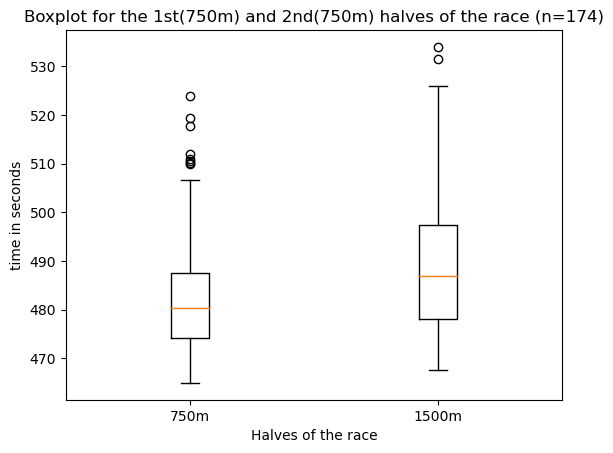

In [54]:
#halves comparison 
Halves = [df['FH'],df['SH']]
plt.boxplot(Halves)

plt.xlabel("Halves of the race")
plt.ylabel("time in seconds")
plt.xticks([1, 2], ['750m', '1500m'] )

plt.title("Boxplot for the 1st(750m) and 2nd(750m) halves of the race (n=174)")
plt.show()

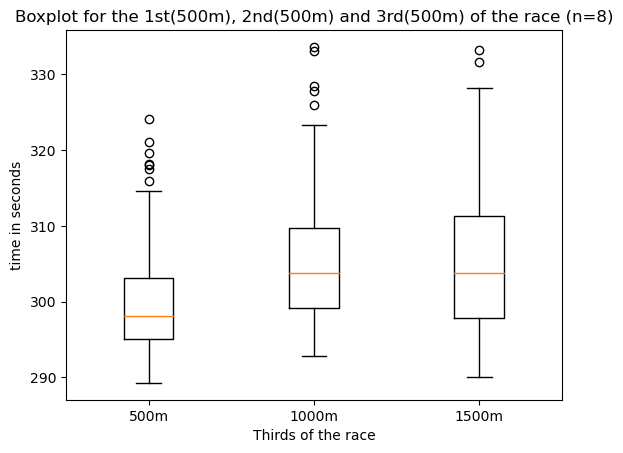

In [55]:
# thirds of the race comparison using Boxplot
thirds = [df['First'],df['Second'],df['Third'],]
plt.boxplot(thirds)
plt.xlabel("Thirds of the race")
plt.ylabel("time in seconds")
 

plt.title("Boxplot for the 1st(500m), 2nd(500m) and 3rd(500m) of the race (n=8)")
plt.xticks([1, 2, 3], ['500m', '1000m', '1500m'] )
plt.show()



In [10]:
selected_columns = df.columns[13:43] 
selected_columns

Index(['50m', '100m', '150m', '200m', '250m', '300m', '350m', '400m', '450m',
       '500m', '550m', '600m', '650m', '700m', '750m', '800m', '850m', '900m',
       '950m', '1000m', '1050m', '1100m', '1150m', '1200m', '1250m', '1300m',
       '1350m', '1400m', '1450m', '1500m'],
      dtype='object')

In [56]:
# CHECK THE DISTRIBUTION OF THE DATA 
from scipy.stats import shapiro

# Iterate over each column and perform the Shapiro-Wilk test for normality
alpha = 0.05  # Significance level
selected_columns = df.columns[13:43] 
num_tests = len(selected_columns) 

for column in selected_columns:
    stat, p_value = shapiro(df[column])
    

        # Bonferroni correction for multiples test
    adjusted_alpha = alpha / num_tests
    if p_value > adjusted_alpha:
        print(f"The data in column '{column}' follows a normal distribution.")
    else:
        print(f"The data in column '{column}' does not follow a normal distribution.")

The data in column '50m' does not follow a normal distribution.
The data in column '100m' does not follow a normal distribution.
The data in column '150m' does not follow a normal distribution.
The data in column '200m' does not follow a normal distribution.
The data in column '250m' does not follow a normal distribution.
The data in column '300m' does not follow a normal distribution.
The data in column '350m' does not follow a normal distribution.
The data in column '400m' does not follow a normal distribution.
The data in column '450m' does not follow a normal distribution.
The data in column '500m' does not follow a normal distribution.
The data in column '550m' does not follow a normal distribution.
The data in column '600m' does not follow a normal distribution.
The data in column '650m' does not follow a normal distribution.
The data in column '700m' does not follow a normal distribution.
The data in column '750m' does not follow a normal distribution.
The data in column '800m' 

In [57]:
# Perform ANOVA to compare the means of the three columns
from scipy.stats import f_oneway, ttest_ind

f_stat, p_value = f_oneway(df['First'], df['Second'], df['Third'])
if p_value < 0.05:
    print("There is a significant difference between the three columns (ANOVA)")

# Perform pairwise t-tests to compare each column with every other column
t_stat1_2, p_value1_2 = ttest_ind(df['First'], df['Second'])
t_stat1_3, p_value1_3 = ttest_ind(df['First'], df['Third'])
t_stat2_3, p_value2_3 = ttest_ind(df['Second'], df['Third'])

if p_value1_2 < 0.05:
    print("There is a significant difference between Column1 and Column2 (t-test)")
if p_value1_3 < 0.05:
    print("There is a significant difference between Column1 and Column3 (t-test)")
if p_value2_3 < 0.05:
    print("There is a significant difference between Column2 and Column3 (t-test)")

print("Column1 vs Column2 - p-value:", p_value1_2)
print("Column1 vs Column2 - t-statistic:", t_stat1_2)

print("Column1 vs Column3 - p-value:", p_value1_3)
print("Column1 vs Column3 - t-statistic:", t_stat1_3)

print("Column2 vs Column3 - p-value:", p_value2_3)
print("Column2 vs Column3 - t-statistic:", t_stat2_3)

There is a significant difference between the three columns (ANOVA)
There is a significant difference between Column1 and Column2 (t-test)
There is a significant difference between Column1 and Column3 (t-test)
Column1 vs Column2 - p-value: 2.1440498890587066e-12
Column1 vs Column2 - t-statistic: -7.288438382070876
Column1 vs Column3 - p-value: 1.4511311562304148e-10
Column1 vs Column3 - t-statistic: -6.610572408051644
Column2 vs Column3 - p-value: 0.9461413800948044
Column2 vs Column3 - t-statistic: 0.06760216429404026


In [58]:
# check for difference between the 250m splits
from itertools import combinations
columns = ['250T', '500T', '750T','1000T','1250T','1500T']
combinations_columns = list(combinations(columns, 2))
for column_pair in combinations_columns:
    col1, col2 = column_pair
    t_stat, p_value = ttest_ind(df[col1], df[col2])
    print(f"{col1} vs {col2} - p-value:", p_value)
    print(f"{col1} vs {col2} - t-statistic:", t_stat)
    
    if p_value < 0.05:
        print(f"Statistically significant difference detected between {col1} and {col2}.")

250T vs 500T - p-value: 2.1945258242848246e-18
250T vs 500T - t-statistic: -9.260687235866635
Statistically significant difference detected between 250T and 500T.
250T vs 750T - p-value: 5.11473597949231e-24
250T vs 750T - t-statistic: -10.910531332862346
Statistically significant difference detected between 250T and 750T.
250T vs 1000T - p-value: 1.1431711945226471e-28
250T vs 1000T - t-statistic: -12.186522218596757
Statistically significant difference detected between 250T and 1000T.
250T vs 1250T - p-value: 2.865194764422709e-32
250T vs 1250T - t-statistic: -13.139169434989412
Statistically significant difference detected between 250T and 1250T.
250T vs 1500T - p-value: 3.6760105063366785e-14
250T vs 1500T - t-statistic: -7.902866547616559
Statistically significant difference detected between 250T and 1500T.
500T vs 750T - p-value: 0.036939338702523104
500T vs 750T - t-statistic: -2.094534525737241
Statistically significant difference detected between 500T and 750T.
500T vs 1000T -

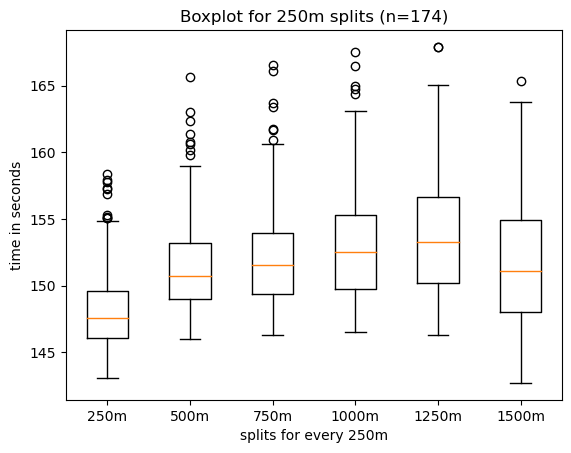

In [59]:
# boxplot for every 250m
partial = [df['250T'],df['500T'],df['750T'],df['1000T'],df['1250T'],df['1500T']]
plt.boxplot(partial)
plt.xlabel("splits for every 250m")
plt.ylabel("time in seconds")
Labels = ['250', '500', '750','1000','1250','1500 '] 

#plt.xticks(Labels)
plt.title("Boxplot for 250m splits (n=174)")
plt.xticks([1, 2, 3,4,5,6], ['250m', '500m', '750m','1000m','1250m','1500m'] )
plt.show()

In [60]:
# average speed per split 
selected_columns = df.columns[13:43]
for i, column in enumerate(selected_columns):
    new_column_name = f'{column}_speed'
    df[new_column_name]= 50/ df[column] 


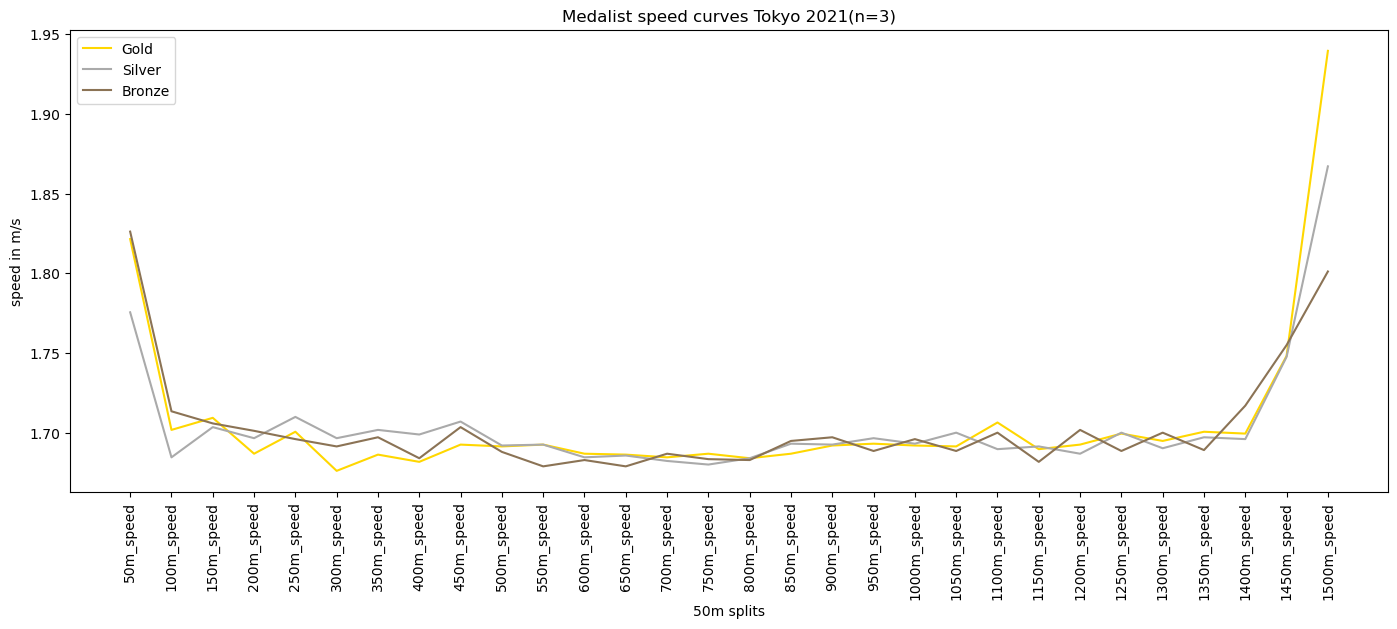

In [61]:
# ploting test of the speeds
rows = df.iloc[0,57:87]
rows1 = df.iloc[1,57:87]
rows2 = df.iloc[2,57:87]
plt.figure(figsize=(17, 6))
#plt.xticks(rotation=90)
#Plot the first row as a line graph
plt.plot(rows, color = '#FFD700')
plt.plot(rows1,color = '#AAAAAA')
plt.plot(rows2,color = '#8B7355')

plt.xlabel("50m splits")
plt.ylabel("speed in m/s")
plt.xticks(rotation=90)
#Labels = ['250', '500', '750','1000','1250','1500 '] 
# naming the title of the plot
#plt.xticks(Labels)

plt.title("Medalist speed curves Tokyo 2021(n=3)")
plt.legend(["Gold", "Silver","Bronze"], loc ="upper left")
plt.show()


In [62]:
df.head()

,games,heat,Olympic,medal,Overall Rank,Lane,Country,Athlete,Age,RT,...,1050m_speed,1100m_speed,1150m_speed,1200m_speed,1250m_speed,1300m_speed,1350m_speed,1400m_speed,1450m_speed,1500m_speed
0,Tokyo,final,1,1.0,1,5,USA,Bobby FINKE,21,0.75,...,1.691475,1.706485,1.689760,1.692620,1.699524,1.694915,1.700680,1.699524,1.748252,1.939488
1,Tokyo,final,1,2.0,2,4,UKR,Mykhailo ROMANCHUK,24,0.70,...,1.700102,1.689760,1.691475,1.686910,1.700102,1.690331,1.697217,1.696065,1.747641,1.867065
2,Tokyo,final,1,3.0,3,3,GER,Florian WELLBROCK,23,0.70,...,1.688619,1.700102,1.681803,1.701838,1.688619,1.700102,1.689189,1.717033,1.755002,1.801153
3,Tokyo,final,1,4.0,4,6,ITA,Gregorio PALTRINIERI,26,0.80,...,1.703578,1.678979,1.701259,1.672241,1.701838,1.670565,1.721763,1.684636,1.708234,1.714678
4,Tokyo,final,1,4.0,5,2,GBR,Daniel JERVIS,25,0.64,...,1.650710,1.642576,1.649077,1.653439,1.640958,1.647446,1.647446,1.653986,1.680108,1.739736


In [63]:
# new descriptives variables for speed and time
df['mean_speed'] = df.iloc[:, 65:87].mean(axis=1)
df['std'] = df.iloc[:, 65:87].std(axis=1) 
df['CV%'] = (df.iloc[:, 65:87].std(axis=1) / df.iloc[:, 65:87].mean(axis=1)) * 100
df['mean_time'] = df.iloc[:, 13:43].mean(axis=1)
df['std_time'] = df.iloc[:, 13:43].std(axis=1) 
df['CV_time'] = (df.iloc[:, 13:43].std(axis=1) / df.iloc[:, 13:43].mean(axis=1)) * 100

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174 entries, 0 to 173
Data columns (total 93 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   games            174 non-null    object        
 1   heat             174 non-null    object        
 2   Olympic          174 non-null    int64         
 3   medal            173 non-null    float64       
 4   Overall Rank     174 non-null    int64         
 5   Lane             174 non-null    int64         
 6   Country          174 non-null    object        
 7   Athlete          174 non-null    object        
 8   Age              174 non-null    int64         
 9   RT               174 non-null    float64       
 10  Time             174 non-null    object        
 11  Time Behind      174 non-null    object        
 12  Points           172 non-null    object        
 13  50m              174 non-null    float64       
 14  100m             174 non-null    float64  

In [65]:
df.head(30)


,games,heat,Olympic,medal,Overall Rank,Lane,Country,Athlete,Age,RT,...,1350m_speed,1400m_speed,1450m_speed,1500m_speed,mean_speed,std,CV%,mean_time,std_time,CV_time
0,Tokyo,final,1,1.0,1,5,USA,Bobby FINKE,21,0.75,...,1.700680,1.699524,1.748252,1.939488,1.706023,0.053777,3.152164,29.321667,0.797112,2.718507
1,Tokyo,final,1,2.0,2,4,UKR,Mykhailo ROMANCHUK,24,0.70,...,1.697217,1.696065,1.747641,1.867065,1.702318,0.039190,2.302143,29.355333,0.581922,1.982337
2,Tokyo,final,1,3.0,3,3,GER,Florian WELLBROCK,23,0.70,...,1.689189,1.717033,1.755002,1.801153,1.699370,0.028025,1.649116,29.363667,0.550689,1.875410
3,Tokyo,final,1,4.0,4,6,ITA,Gregorio PALTRINIERI,26,0.80,...,1.721763,1.684636,1.708234,1.714678,1.689494,0.014804,0.876222,29.500333,0.538884,1.826706
4,Tokyo,final,1,4.0,5,2,GBR,Daniel JERVIS,25,0.64,...,1.647446,1.653986,1.680108,1.739736,1.665077,0.021207,1.273615,29.849333,0.614923,2.060090
5,Tokyo,final,1,4.0,6,8,ROC,Kirill MARTYNYCHEV,19,0.69,...,1.654533,1.668892,1.682369,1.797268,1.668785,0.029768,1.783813,29.861667,0.622875,2.085867
6,Tokyo,final,1,4.0,7,1,AUT,Felix AUBOECK,24,0.77,...,1.630258,1.639882,1.636126,1.686910,1.646904,0.018531,1.125177,30.115667,0.623570,2.070582
7,Tokyo,final,1,4.0,8,7,UKR,Sergii FROLOV,29,0.76,...,1.612903,1.622850,1.658375,1.709402,1.650098,0.023861,1.446048,30.142000,0.616242,2.044464
8,Tokyo,heat 1,1,4.0,1,5,IRL,Daniel WIFFEN,20,0.70,...,1.649077,1.664447,1.650165,1.708234,1.653349,0.016706,1.010458,30.256333,0.506097,1.672698
9,Tokyo,heat 1,1,4.0,2,3,ESA,Marcelo ACOSTA,25,0.75,...,1.599488,1.600512,1.685204,1.724733,1.610089,0.034006,2.112067,30.912333,0.809000,2.617078


## Split the data in FINAL and HEATS


In [66]:
df_finals= df[df['heat']== 'final']
df_finals.head()

,games,heat,Olympic,medal,Overall Rank,Lane,Country,Athlete,Age,RT,...,1350m_speed,1400m_speed,1450m_speed,1500m_speed,mean_speed,std,CV%,mean_time,std_time,CV_time
0,Tokyo,final,1,1.0,1,5,USA,Bobby FINKE,21,0.75,...,1.700680,1.699524,1.748252,1.939488,1.706023,0.053777,3.152164,29.321667,0.797112,2.718507
1,Tokyo,final,1,2.0,2,4,UKR,Mykhailo ROMANCHUK,24,0.70,...,1.697217,1.696065,1.747641,1.867065,1.702318,0.039190,2.302143,29.355333,0.581922,1.982337
2,Tokyo,final,1,3.0,3,3,GER,Florian WELLBROCK,23,0.70,...,1.689189,1.717033,1.755002,1.801153,1.699370,0.028025,1.649116,29.363667,0.550689,1.875410
3,Tokyo,final,1,4.0,4,6,ITA,Gregorio PALTRINIERI,26,0.80,...,1.721763,1.684636,1.708234,1.714678,1.689494,0.014804,0.876222,29.500333,0.538884,1.826706
4,Tokyo,final,1,4.0,5,2,GBR,Daniel JERVIS,25,0.64,...,1.647446,1.653986,1.680108,1.739736,1.665077,0.021207,1.273615,29.849333,0.614923,2.060090


In [67]:
df_heat= df[df['heat']!= 'final']
df_heat.head(5)

,games,heat,Olympic,medal,Overall Rank,Lane,Country,Athlete,Age,RT,...,1350m_speed,1400m_speed,1450m_speed,1500m_speed,mean_speed,std,CV%,mean_time,std_time,CV_time
8,Tokyo,heat 1,1,4.0,1,5,IRL,Daniel WIFFEN,20,0.70,...,1.649077,1.664447,1.650165,1.708234,1.653349,0.016706,1.010458,30.256333,0.506097,1.672698
9,Tokyo,heat 1,1,4.0,2,3,ESA,Marcelo ACOSTA,25,0.75,...,1.599488,1.600512,1.685204,1.724733,1.610089,0.034006,2.112067,30.912333,0.809000,2.617078
10,Tokyo,heat 1,1,4.0,3,4,INA,Aflah Fadlan PRAWIRA,23,0.56,...,1.603592,1.615509,1.634521,1.699524,1.603038,0.027948,1.743466,30.998000,0.819265,2.642962
11,Tokyo,heat 1,1,4.0,4,2,MON,Theo DRUENNE,16,0.76,...,1.518834,1.516990,1.532802,1.567890,1.525167,0.016253,1.065683,32.573333,0.751047,2.305711
12,Tokyo,heat 2,1,4.0,1,8,AUT,Felix AUBOECK,24,0.74,...,1.670007,1.685204,1.677852,1.834862,1.681145,0.035251,2.096827,29.729333,0.639385,2.150688


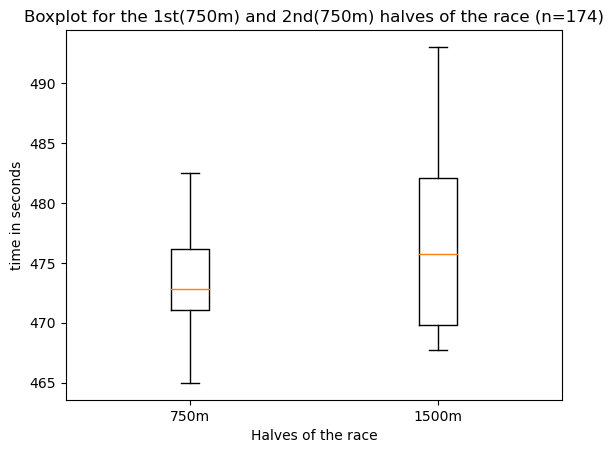

In [68]:
#boxplot comaprison for the halves in the Finals
Halves_F = [df_finals['FH'],df_finals['SH']]
plt.boxplot(Halves_F)

plt.xlabel("Halves of the race")
plt.ylabel("time in seconds")
plt.xticks([1, 2], ['750m', '1500m'] )

plt.title("Boxplot for the 1st(750m) and 2nd(750m) halves of the race (n=174)")
plt.show()

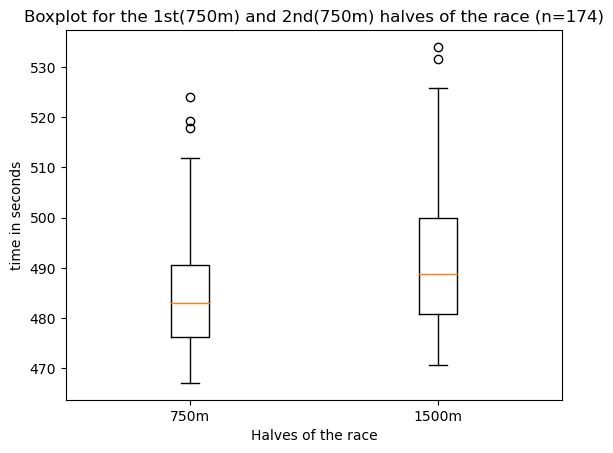

In [70]:
#boxplot comaprison for the halves in the HEATS
Halves_H = [df_heat['FH'],df_heat['SH']]
plt.boxplot(Halves_H)

plt.xlabel("Halves of the race")
plt.ylabel("time in seconds")
plt.xticks([1, 2], ['750m', '1500m'] )
# naming the title of the plot
plt.title("Boxplot for the 1st(750m) and 2nd(750m) halves of the race (n=174)")
plt.show()

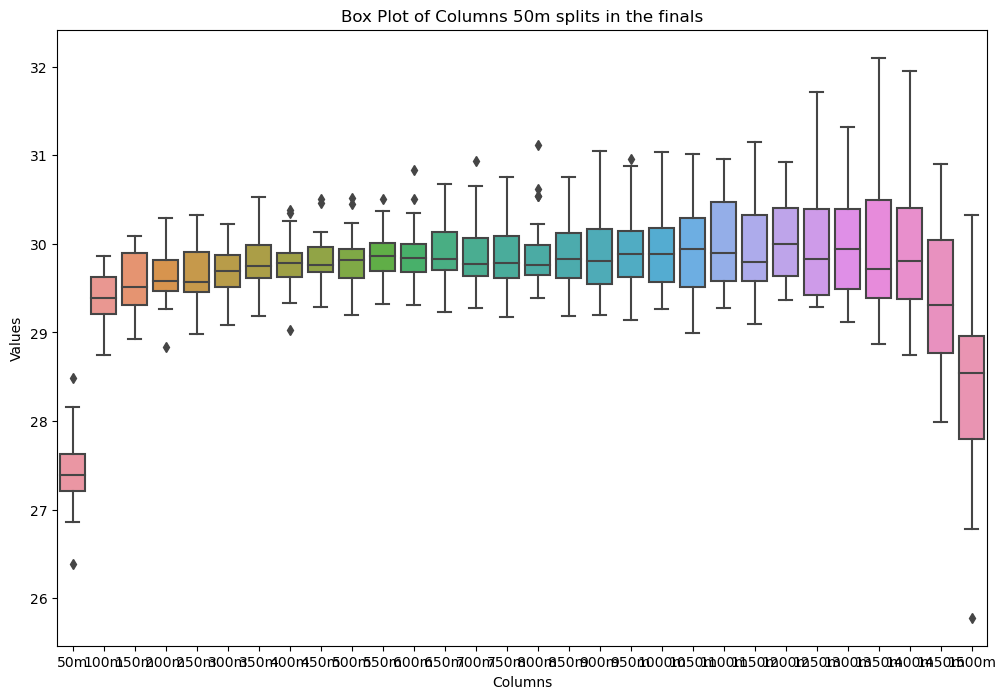

In [72]:
# split time visualization of the split times  FInal
import seaborn as sns
import matplotlib.pyplot as plt


selected_columns = df_finals.columns[13:43]  # 

# Create a box plot for selected columns
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_finals[selected_columns])
plt.xlabel('Columns')
plt.ylabel('Values')
plt.title('Box Plot of Columns 50m splits in the finals')
plt.show()

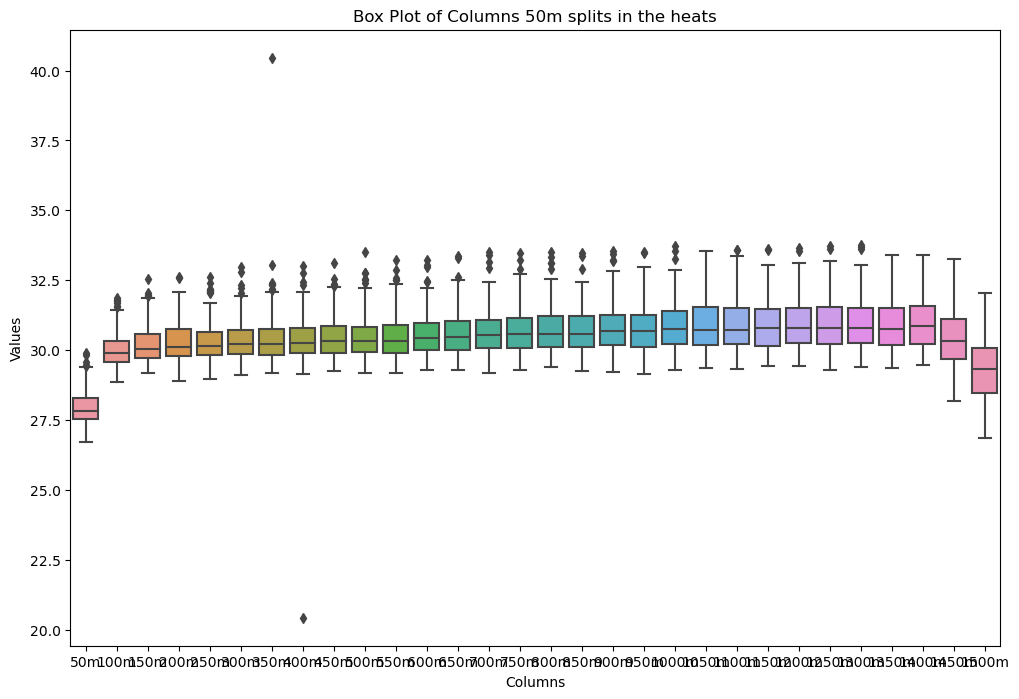

In [73]:
# split time visualization of the split times  HEATS
selected_columns = df_heat.columns[13:43]  # 

# Create a box plot for selected columns
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_heat[selected_columns])
plt.xlabel('Columns')
plt.ylabel('Values')
plt.title('Box Plot of Columns 50m splits in the heats')
plt.show()

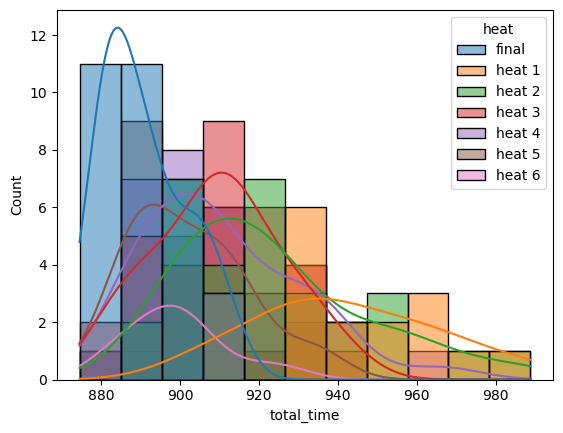

In [76]:
# HIstogram of the data based on final and heats regarding the total time
sns.histplot(df, x='total_time', hue='heat', kde=True)  
plt.show()

In [77]:
t_stat, p_value = ttest_ind(df_heat['mean_time'],df_finals['mean_time'])

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

if p_value < 0.05:
    print("There is a significant difference between heats and finals.")
else:
    print("There is no significant difference between heats and finals.")

T-statistic: 5.801776436496743
P-value: 3.083683312557386e-08
There is a significant difference between heats and finals.


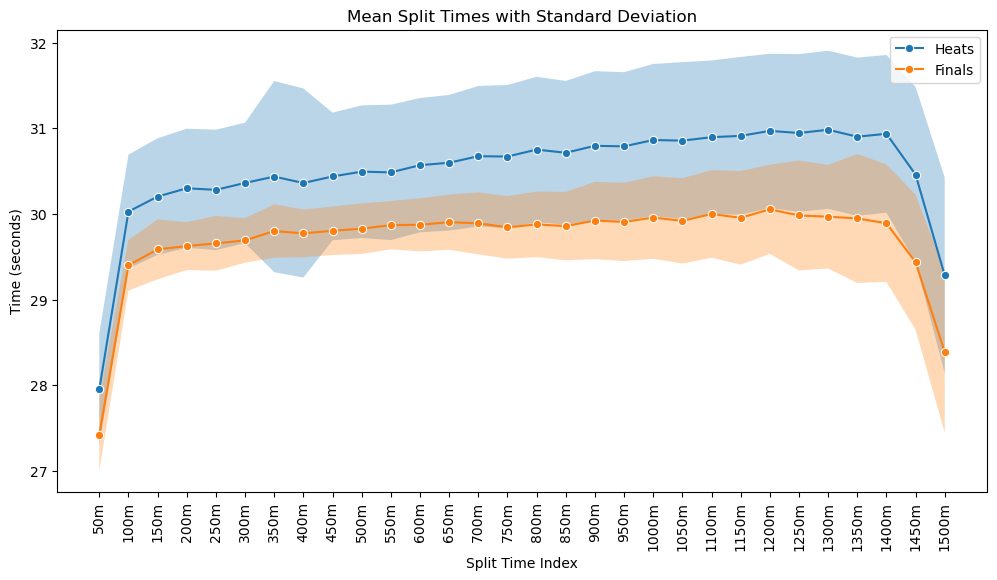

In [29]:
# data visialuzation of Finals and Heats mean time and std


heats_data = df[df['heat'] != 'final'].iloc[:, 13:43]  
finals_data = df[df['heat'] == 'final'].iloc[:, 13:43]  

# Calculate mean and standard deviation for each split time
heats_mean = heats_data.mean()
heats_std = heats_data.std()

finals_mean = finals_data.mean()
finals_std = finals_data.std()

# Plotting
plt.figure(figsize=(12, 6))
sns.lineplot(x=heats_data.columns, y=heats_mean, label='Heats', marker='o')
plt.fill_between(heats_data.columns, heats_mean - heats_std, heats_mean + heats_std, alpha=0.3)

sns.lineplot(x=finals_data.columns, y=finals_mean, label='Finals', marker='o')
plt.fill_between(finals_data.columns, finals_mean - finals_std, finals_mean + finals_std, alpha=0.3)

plt.title('Mean Split Times with Standard Deviation')
plt.xlabel('Split Time Index')
plt.ylabel('Time (seconds)')
plt.xticks(rotation=90) 
plt.legend()
plt.show()


In [78]:
diff_tme = heats_mean - finals_mean
diff_tme

50m      0.532909
100m     0.626809
150m     0.616747
200m     0.675524
250m     0.624533
300m     0.671739
350m     0.635854
400m     0.588565
450m     0.634036
500m     0.666413
550m     0.616259
600m     0.696734
650m     0.694247
700m     0.784023
750m     0.827478
800m     0.873534
850m     0.856593
900m     0.872830
950m     0.882421
1000m    0.905678
1050m    0.937033
1100m    0.896549
1150m    0.957254
1200m    0.915594
1250m    0.963063
1300m    1.015326
1350m    0.954652
1400m    1.044604
1450m    1.023570
1500m    0.896426
dtype: float64

In [79]:
# save the data 
df.to_csv('full_data_swim.csv', index=False)
df_finals.to_csv('finals_df.csv', index=False)
df_heat.to_csv('heat_df.csv', index=False)

## Predictions of the Final times based on heats times
## data for the ECSS prediction paper




In [82]:
# feature split  and taregt for trainning using only the data from the heats using KNN model (TEST)
import pandas as pd
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Drop irrelevant columns
#df_heat.drop(["games", "heat", "Olympic", "medal", "Overall Rank", "Lane", "Country",
#          "Athlete", "Age", "time_only", "datetime_column","RT"], axis=1, inplace=True)

# Convert object columns to numerical (if necessary)
# Example: Assuming "RT" needs conversion
#data["RT"] = pd.to_numeric(data["RT"], errors="coerce")

# Select features and target variable
features = df_heat.drop("total_time", axis=1)
target = df_heat["total_time"]

# Split data
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Train k-NN model (specify relevant heat features)
knn = KNeighborsRegressor(n_neighbors=2)
knn.fit(X_train[["50m", "100m", "150m", "200m", "250m","300m","400m","500m","500m_speed","750T"]], y_train)  

# Make predictions
y_pred = knn.predict(X_test[["50m", "100m", "150m", "200m", "250m","300m","400m","500m","500m_speed","750T"]])

# Evaluate performance
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)




Mean Squared Error: 35.93992068965483


# predictions start here
using 2 data frames
one with heats 
one with finals 

In [83]:
# feature split  and target for trainning using only the data from the heats 
# using a Random Forest Regressor 
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error

# Load data
data = pd.read_csv("heat_df.csv")

# Drop irrelevant columns 
data.drop(["Time","Time Behind","Points","games", "heat", "Olympic", "medal", "Overall Rank", "Lane", "Country",
          "Athlete", "Age", "time_only", "datetime_column","RT"], axis=1, inplace=True)


# Select features and target variable
features = data.drop("total_time", axis=1)
target = data["total_time"]

# Split data
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Define hyperparameter grids for tuning 
param_grid = {
    "n_estimators": [100, 200, 300],
    "max_depth": [5, 8, 10],
    "min_samples_leaf": [1, 5, 10],
    "max_features": ["sqrt", "log2"],
}

# Perform grid search cross-validation to find optimal hyperparameters
rf_model = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring="neg_mean_squared_error")
grid_search.fit(X_train, y_train)
best_parameters = grid_search.best_params_
print("Best hyperparameters:", best_parameters)

# Create a new random forest model with the best hyperparameters
rf_model = RandomForestRegressor(**best_parameters)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate performance
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)



Best hyperparameters: {'max_depth': 8, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'n_estimators': 200}
Mean Squared Error: 6.54383819660412


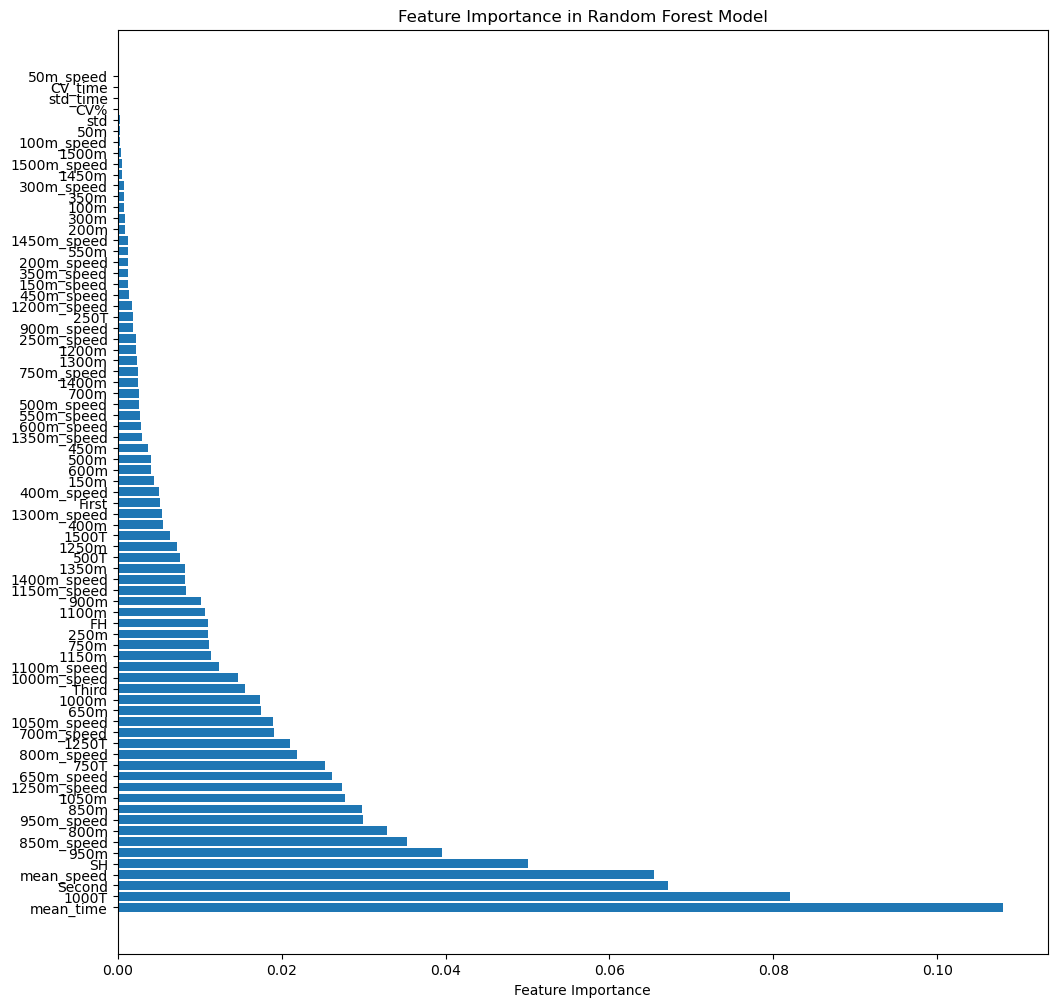

In [84]:
#Features visualization
# Sort feature importances in descending order
feature_names = X_train.columns
importances = rf_model.feature_importances_
indices = importances.argsort()[::-1]
sorted_feature_names = feature_names[indices]
sorted_importances = importances[indices]

# Plotting
plt.figure(figsize=(12, 12))
plt.barh(sorted_feature_names, sorted_importances)
plt.xlabel("Feature Importance")
plt.title("Feature Importance in Random Forest Model")
plt.show()

This code will train the RandomForestRegressor with the specified hyperparameters and features, and it will print the Mean Squared Error on the test set for evaluation.

In [85]:
# model trainning with best hyperparameters and with selected features
# features selected based on the features importance based on Domain Knowledge 
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import explained_variance_score

# Load data
data = pd.read_csv("heat_df.csv")
data.drop(["Time","Time Behind","Points","games", "heat", "Olympic", "medal", "Overall Rank", "Lane", "Country",
          "Athlete", "Age", "time_only", "datetime_column","RT"], axis=1, inplace=True)

# Select relevant features
selected_features = ["mean_time", "1000T", "mean_speed", "800m_speed", "850m", "950m", "850m_speed", "800m", "950m_speed", "1250T"]
target = data['total_time']
X = data[selected_features]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=0.2, random_state=42)

# Create a RandomForestRegressor with best hyperparameters
best_hyperparameters = {'max_depth': 8, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'n_estimators': 200}
rf_model = RandomForestRegressor(**best_hyperparameters, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the test set
predictions = rf_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
print(f"Mean Squared Error on the test set: {mse}")

# Make predictions on the test set
predictions = rf_model.predict(X_test)

# Evaluate the model on the test set
mse_test = mean_squared_error(y_test, predictions)
rmse_test = mean_squared_error(y_test, predictions, squared=False)
mae_test = mean_absolute_error(y_test, predictions)
r2_test = r2_score(y_test, predictions)
evs_test = explained_variance_score(y_test, predictions)

# Print teh results
print(f"Mean Squared Error on the test set: {mse_test}")
print(f"Root Mean Squared Error on the test set: {rmse_test}")
print(f"Mean Absolute Error on the test set: {mae_test}")
print(f"R-squared on the test set: {r2_test}")
print(f"Explained Variance Score on the test set: {evs_test}")


Mean Squared Error on the test set: 8.992082741790894
Mean Squared Error on the test set: 8.992082741790894
Root Mean Squared Error on the test set: 2.998680166638465
Mean Absolute Error on the test set: 2.036881162372028
R-squared on the test set: 0.9842357479368867
Explained Variance Score on the test set: 0.98430529001299


This code assumes that X_test contains the feature values for the test set, and y_test contains the corresponding actual total time values.
a line plot to visualize the predictions and actual values
The scatter plot will give you a visual representation of how well your model's predictions align with the actual values. The diagonal line represents a perfect prediction, and the points should ideally cluster around this line.

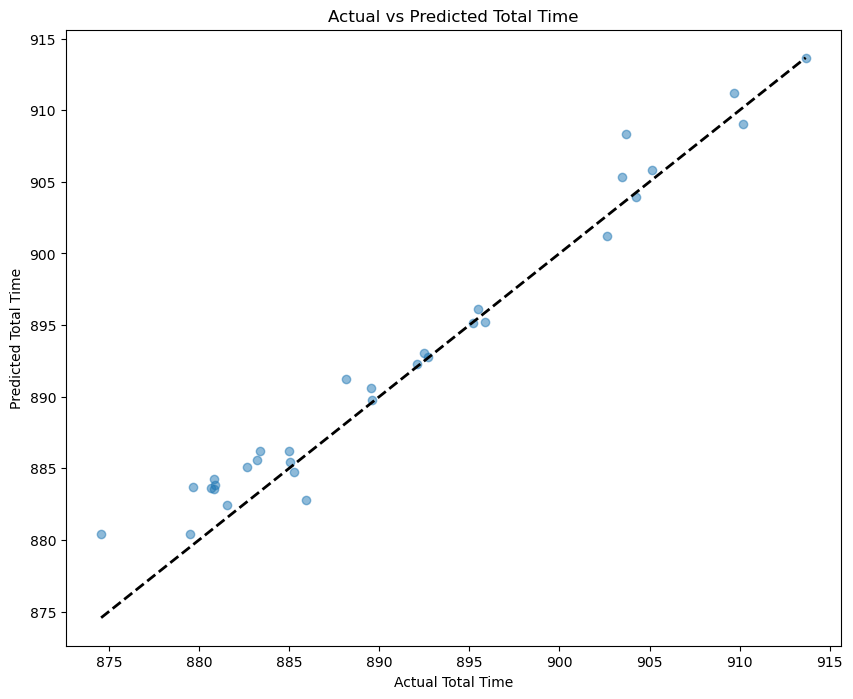

In [86]:

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error



# Load your test data
test_data = pd.read_csv("finals_df.csv")
test_data.drop(["Time","Time Behind","Points","games", "heat", "Olympic", "medal", "Overall Rank", "Lane", "Country",
          "Athlete", "Age", "time_only", "datetime_column","RT"], axis=1, inplace=True)

# Extract the features and target variable from the test data
X_test = test_data[["mean_time", "1000T", "mean_speed", "800m_speed", "850m", "950m", "850m_speed", "800m", "950m_speed", "1250T"]]
y_test = test_data['total_time']

# Make predictions
predictions = rf_model.predict(X_test)

# Plotting the predictions against the actual values
plt.figure(figsize=(10, 8))
plt.scatter(y_test, predictions, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--k', linewidth=2)  # Diagonal line for reference
plt.xlabel('Actual Total Time')
plt.ylabel('Predicted Total Time')
plt.title('Actual vs Predicted Total Time')
plt.show()


In [87]:
# Make predictions on the test set
predictions = rf_model.predict(X_test)

# Evaluate the model on the test set
mse_test = mean_squared_error(y_test, predictions)
rmse_test = mean_squared_error(y_test, predictions, squared=False)
mae_test = mean_absolute_error(y_test, predictions)
r2_test = r2_score(y_test, predictions)
evs_test = explained_variance_score(y_test, predictions)

# Print or log the results
print(f"Mean Squared Error on the test set: {mse_test}")
print(f"Root Mean Squared Error on the test set: {rmse_test}")
print(f"Mean Absolute Error on the test set: {mae_test}")
print(f"R-squared on the test set: {r2_test}")
print(f"Explained Variance Score on the test set: {evs_test}")


Mean Squared Error on the test set: 5.098232921999027
Root Mean Squared Error on the test set: 2.2579266865863974
Mean Absolute Error on the test set: 1.7075159353538005
R-squared on the test set: 0.9532949604463351
Explained Variance Score on the test set: 0.967619846349375


In [88]:

# Updated metrics
updated_metrics_dict = {
    'Mean Squared Error': [5.098232921999027],
    'Root Mean Squared Error': [2.2579266865863974],
    'Mean Absolute Error': [1.7075159353538005],
    'R-squared': [0.9532949604463351],
    'Explained Variance Score': [0.967619846349375]
}

# Create a DataFrame from the updated metrics
updated_metrics_df = pd.DataFrame(updated_metrics_dict)

# Save the DataFrame as a CSV file
updated_metrics_df.to_csv('test_metrics_table.csv', index=False)


This code assumes that data[features] contains the feature values for the entire dataset, and target contains the corresponding actual total time values.

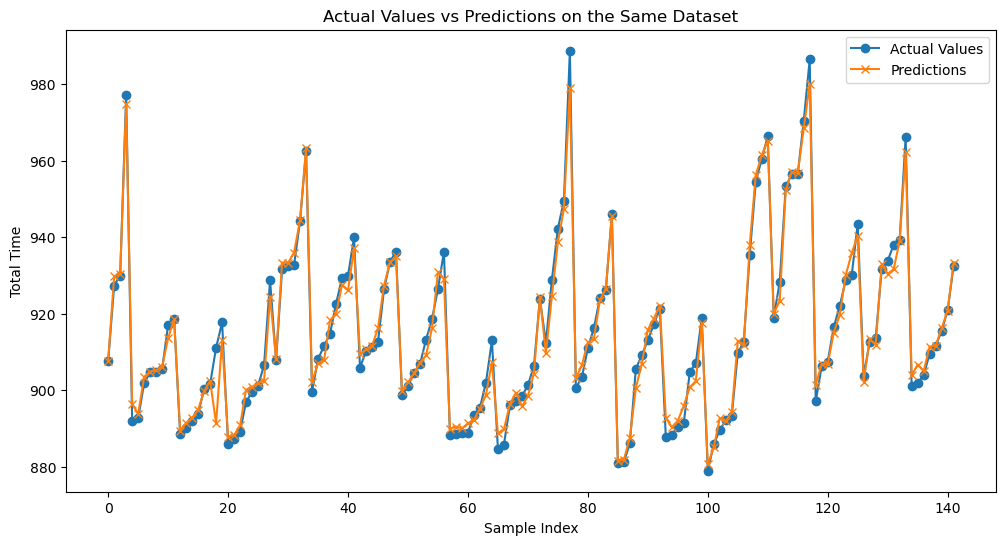

In [89]:
# train the model and plot the results from the dataset and test set
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Load data
data = pd.read_csv("heat_df.csv")

# Drop irrelevant columns * check the columns that were droped before 
data.drop(["Time", "Time Behind", "Points", "games", "heat", "Olympic", "medal", "Overall Rank", "Lane", "Country",
           "Athlete", "Age", "time_only", "datetime_column", "RT"], axis=1, inplace=True)

# Define the feature set
features = ["50m_speed", "100m_speed", "150m_speed", "200m_speed", "250m_speed", "300m_speed", "400m_speed", "500m_speed",
            "550m_speed", "600m_speed", "650m_speed", "700m_speed", "750m_speed", "FH", "750T"]

# Define the target variable
target = data['total_time']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(data[features], target, test_size=0.2, random_state=42)

# Initialize and train the model
rf_model = RandomForestRegressor(max_depth=8, max_features='sqrt', min_samples_leaf=1, n_estimators=200)
rf_model.fit(X_train, y_train)

# Make predictions on the dataset
predictions = rf_model.predict(data[features])

# Plot the predictions and actual values
plt.figure(figsize=(12, 6))
plt.plot(target.values, label='Actual Values', marker='o')
plt.plot(predictions, label='Predictions', marker='x')
plt.xlabel('Sample Index')
plt.ylabel('Total Time')
plt.title('Actual Values vs Predictions on the Same Dataset')
plt.legend()
plt.show()


This code trains a new RandomForestRegressor (new_rf_model) using the relevant features from your original dataset and then makes predictions on the new dataset.

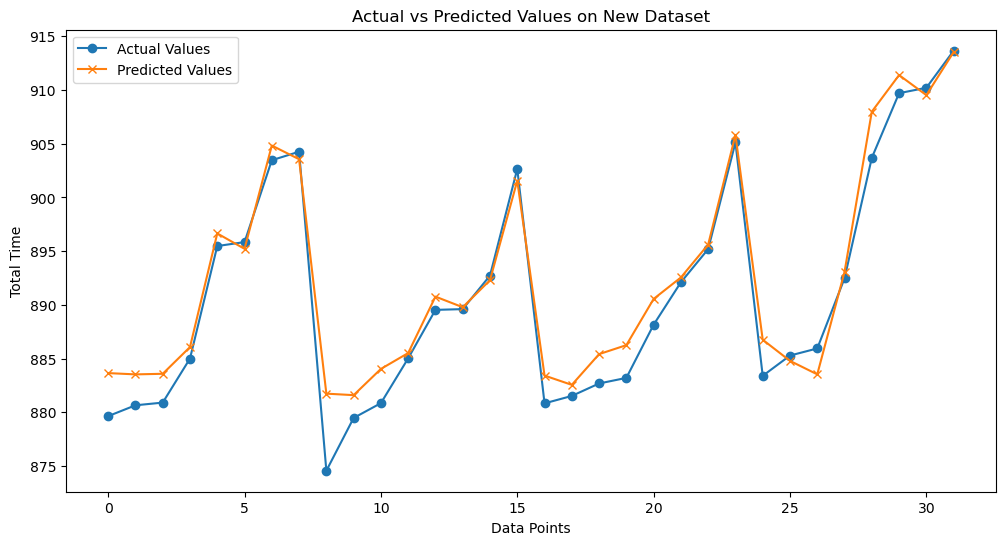

In [90]:
# predict the times based on the trained data in a new data (never seem before by the model)
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


# Load data
data = pd.read_csv("heat_df.csv")
data.drop(["Time", "Time Behind", "Points", "games", "heat", "Olympic", "medal", "Overall Rank", "Lane", "Country",
           "Athlete", "Age", "time_only", "datetime_column", "RT"], axis=1, inplace=True)

# Select relevant features
selected_features = ["mean_time", "1000T", "mean_speed", "800m_speed", "850m", "950m", "850m_speed", "800m", "950m_speed", "1250T"]
target = data['total_time']
X = data[selected_features]

# Train a new RandomForestRegressor with the relevant features
new_rf_model = RandomForestRegressor(n_estimators=200, max_depth=8, max_features='sqrt', min_samples_leaf=1, random_state=42)
new_rf_model.fit(X, target)

# Load the new data
new_data = pd.read_csv("finals_df.csv")
new_data.drop(["Time", "Time Behind", "Points", "games", "heat", "Olympic", "medal", "Overall Rank", "Lane", "Country",
              "Athlete", "Age", "time_only", "datetime_column", "RT"], axis=1, inplace=True)

# Define the relevant features for prediction
selected_features_new = ["mean_time", "1000T", "mean_speed", "800m_speed", "850m", "950m", "850m_speed", "800m", "950m_speed", "1250T"]

# Extract features from the new dataset
X_new = new_data[selected_features_new]

# Make predictions on the new dataset using the new model
predictions_new = new_rf_model.predict(X_new)

# Plot predictions against actual values
plt.figure(figsize=(12, 6))
plt.plot(new_data['total_time'], label='Actual Values', marker='o')
plt.plot(predictions_new, label='Predicted Values', marker='x')
plt.xlabel('Data Points')
plt.ylabel('Total Time')
plt.title('Actual vs Predicted Values on New Dataset')
plt.legend()
plt.show()


In [91]:
# Make predictions on the test set
predictions = rf_model.predict(X_test)

# Evaluate the model on the test set
mse_test = mean_squared_error(y_test, predictions)
rmse_test = mean_squared_error(y_test, predictions, squared=False)
mae_test = mean_absolute_error(y_test, predictions)
r2_test = r2_score(y_test, predictions)
evs_test = explained_variance_score(y_test, predictions)

# Print or log the results
print(f"Mean Squared Error on the test set: {mse_test}")
print(f"Root Mean Squared Error on the test set: {rmse_test}")
print(f"Mean Absolute Error on the test set: {mae_test}")
print(f"R-squared on the test set: {r2_test}")
print(f"Explained Variance Score on the test set: {evs_test}")

Mean Squared Error on the test set: 32.23538803050943
Root Mean Squared Error on the test set: 5.677621687864508
Mean Absolute Error on the test set: 4.354966540134201
R-squared on the test set: 0.9434873102419867
Explained Variance Score on the test set: 0.9468670823104869


save metrics as table

In [92]:
# Create a dictionary with the metrics
metrics_dict = {
    'Mean Squared Error': [32.53447670190799],
    'Root Mean Squared Error': [5.7039001307796395],
    'Mean Absolute Error': [4.400485502398286],
    'R-squared': [0.9429629701818986],
    'Explained Variance Score': [0.946205417071979]
}

# Create a DataFrame from the dictionary
metrics_df = pd.DataFrame(metrics_dict)

# Save the DataFrame as a CSV file
metrics_df.to_csv('metrics_table_final.csv', index=False)

This code will perform 5-fold cross-validation, calculate the mean and standard deviation of the cross-validation scores, and print both the cross-validation scores and the evaluation metrics on the test set. Adjust the number of folds (cv) based on your preferences.

In [93]:
# cross validation 
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import explained_variance_score

# Load data
data = pd.read_csv("heat_df.csv")
data.drop(["Time", "Time Behind", "Points", "games", "heat", "Olympic", "medal", "Overall Rank", "Lane", "Country",
           "Athlete", "Age", "time_only", "datetime_column", "RT"], axis=1, inplace=True)

# Select relevant features
selected_features = ["mean_time", "1000T", "mean_speed", "800m_speed", "850m", "950m", "850m_speed", "800m", "950m_speed", "1250T"]
target = data['total_time']
X = data[selected_features]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=0.2, random_state=42)

# Create a RandomForestRegressor with best hyperparameters
best_hyperparameters = {'max_depth': 8, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'n_estimators': 200}
rf_model = RandomForestRegressor(**best_hyperparameters, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Perform cross-validation
cv_scores = cross_val_score(rf_model, X, target, cv=5, scoring='neg_mean_squared_error')

# Convert negative MSE scores to positive
cv_scores = -cv_scores

# Print cross-validation scores
print("Cross-Validation Scores:")
print(cv_scores)

# Calculate and print mean and standard deviation of the cross-validation scores
print(f"Mean MSE: {cv_scores.mean()}")
print(f"Standard Deviation MSE: {cv_scores.std()}")

# Make predictions on the test set
predictions_test = rf_model.predict(X_test)

# Evaluate the model on the test set
mse_test = mean_squared_error(y_test, predictions_test)
rmse_test = mean_squared_error(y_test, predictions_test, squared=False)
mae_test = mean_absolute_error(y_test, predictions_test)
r2_test = r2_score(y_test, predictions_test)
evs_test = explained_variance_score(y_test, predictions_test)

# Print or log the results
print(f"Mean Squared Error on the test set: {mse_test}")
print(f"Root Mean Squared Error on the test set: {rmse_test}")
print(f"Mean Absolute Error on the test set: {mae_test}")
print(f"R-squared on the test set: {r2_test}")
print(f"Explained Variance Score on the test set: {evs_test}")


Cross-Validation Scores:
[ 5.90676359  6.03376396  8.74526595 19.58045905  4.57204892]
Mean MSE: 8.967660292713674
Standard Deviation MSE: 5.476845666659073
Mean Squared Error on the test set: 8.992082741790894
Root Mean Squared Error on the test set: 2.998680166638465
Mean Absolute Error on the test set: 2.036881162372028
R-squared on the test set: 0.9842357479368867
Explained Variance Score on the test set: 0.98430529001299


These are the mean squared error values for each of the 5 folds in the cross-validation process.